# Factory

Factory é um design pattern de criação que tem como objetivo, cirar elementos de acordo com o especificidade do usuario

## Factory Simple

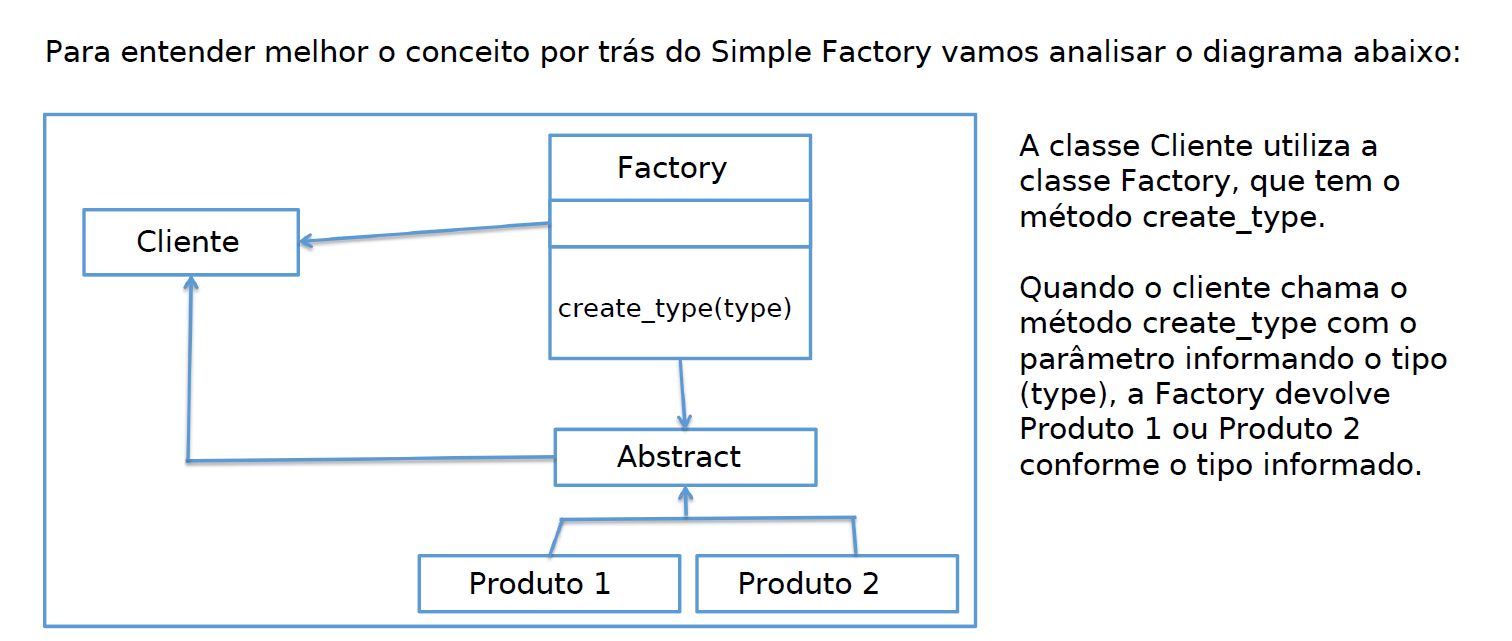

In [2]:
from abc import ABCMeta, abstractmethod

In [2]:
# principal class - Mother Class  
class Animal(metaclass=ABCMeta):
    
    @abstractmethod
    def emit_sound(self):
        pass

In [9]:
# classes Son
class Dog(Animal):
    
    def emit_sound(self):
        return "Au Au Au"
    

class Cat(Animal):
    def emit_sound(self):
        return "Miau Miau"


In [16]:
# factory
class FactoryAnimal:
    
    def create(self, type_:int):
        
        """
        Create object animal
        
        Args:
            type_(int): type animal create. 
            types accept 1 - dog and 0 - cat
        
        Returns:
            Class Animal:return a object of implemets
            abstract class animal
        """
        
        if type_ == 0:
            return Cat()
        elif type_ == 1:
            return Dog()
        else:
            raise ValueError(
                "value expect not accept in function")

In [17]:
factory = FactoryAnimal()

In [18]:
factory.create(0).emit_sound()

'Miau Miau'

In [19]:
factory.create(1).emit_sound()

'Au Au Au'

In [20]:
factory.create(2).emit_sound()

ValueError: value expect not accept in function

## FACTORY METYHOD

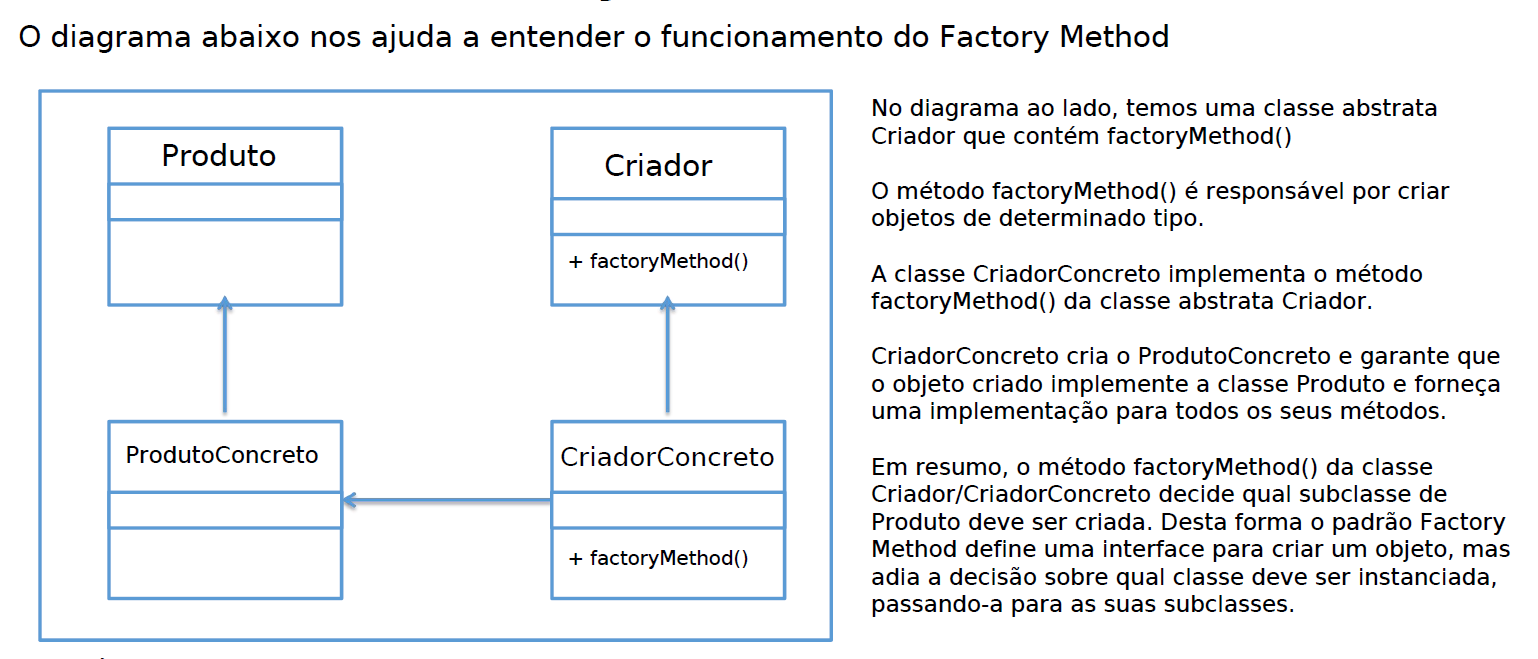

In [27]:
# pruduto -> class abstract - class mother
class Pub(metaclass = ABCMeta):
    
    @abstractmethod
    def __repr__(self):
        pass

In [35]:
# final product -> classes son 
class Carousel(Pub):
    
    def __repr__(self):
        return "Carousel"
    

class Story(Pub):
    
    def __repr__(self):
        return "Story"

class Feed(Pub):
    
    def __repr__(self):
        return "Feed"

In [39]:
# factory - abstract class - class mother
class Perfil(metaclass = ABCMeta):
    
    def __init__(self):
        self.publication = []
        self.create_perfil()
    
    @abstractmethod
    def create_perfil(sefl):
        pass
    
    
    def get_publications(self):
        return self.publication
    
    def add_publication(self, pub):
        self.publication.append(pub)
        return True

In [40]:
# factory final - classes son
class Facebook(Perfil):
    
    def create_perfil(self):
        self.add_publication(Feed())
        self.add_publication(Story())
        
        
class Instagram(Perfil):
    
    def create_perfil(self):
        self.add_publication(Feed())
        self.add_publication(Story())
        self.add_publication(Carousel())

In [41]:
Facebook().get_publications()

[Feed, Story]

In [42]:
Instagram().get_publications()

[Feed, Story, Carousel]

## Abtract Factory 

O principal objetivo do padrão Abstract Factory é fornecer uma interface para criar famílias de
objetos relacionados sem especificar a classe concreta.

Enquanto o Factory Method adia a criação da instância para as subclasses, o objetivo do
Abstract Factory é criar famílias de objetos relacionados

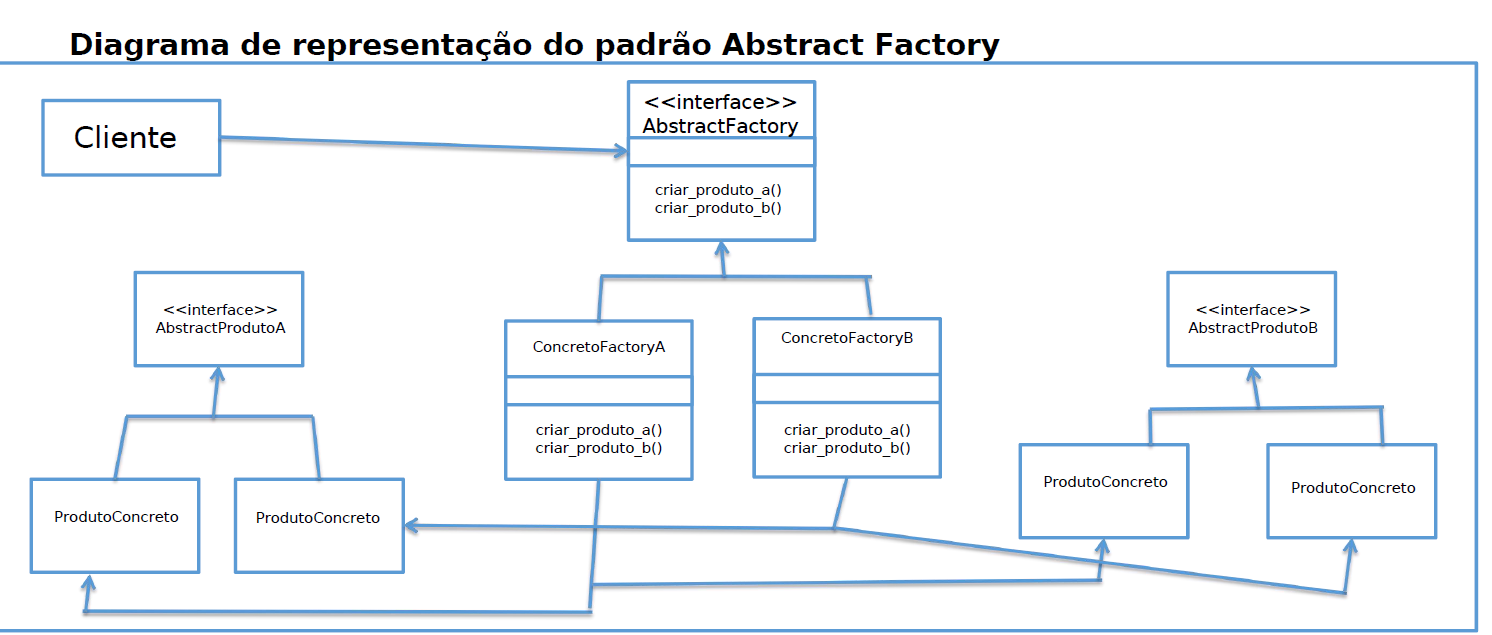

In [43]:
# Abstract factory
class PizzaryFactory(metaclass = ABCMeta):
    
    def create_pizza(self):
        pass
    
    def create_pizza_veg(self):
        pass
    

In [52]:
# Factory concret A 
class PizzaryBrazilianFactory(PizzaryFactory):
    
    def create_pizza(self):
        return PizzaCamarrao()
    
    def create_pizza_veg(self):
        return PizzaMandioca()
    
# Factory concret B
class PizzaryItalianFactory(PizzaryFactory):
    
    def create_pizza(self):
        return PizzaBolonhesa()
    
    def create_pizza_veg(self):
        return PizzaBrocolis()
    


In [53]:
# abstrac product  - procut A
class PizzaVeg(metaclass = ABCMeta):
    
    @abstractmethod
    def prepare(self):
        pass

# abstrac product  - procut B
class PizzaNormal(metaclass = ABCMeta):
    
    @abstractmethod
    def serve(self, pizza_veg):
        pass

In [54]:
# product concrete - procut A 
class PizzaMandioca(PizzaVeg):
    
    def prepare(self):
        print(
            f"prepare pizza: {type(self).__name__}")

class PizzaBrocolis(PizzaVeg):
    
    def prepare(self):
        print(
            f"prepare pizza: {type(self).__name__}")


# product concrete - product B
class PizzaBolonhesa(PizzaNormal):
    
    def serve(self, pizza_veg):
        print(
            f"serve pizza {type(self).__name__} apart with {type(pizza_veg).__name__} ")
        
class PizzaCamarrao(PizzaNormal):
    
    def serve(self, pizza_veg):
        print(
            f"serve pizza {type(self).__name__} apart with {type(pizza_veg).__name__} ")

In [55]:
pizzariaA = PizzaryBrazilianFactory()
pizza = pizzariaA.create_pizza()
pizza_veg = pizzariaA.create_pizza_veg()
pizza_veg.prepare()
pizza.serve(pizza_veg)

prepare pizza: PizzaMandioca
serve pizza PizzaCamarrao apart with PizzaMandioca 


In [56]:
pizzariaB = PizzaryItalianFactory()
pizza = pizzariaB.create_pizza()
pizza_veg = pizzariaB.create_pizza_veg()
pizza_veg.prepare()
pizza.serve(pizza_veg)

prepare pizza: PizzaBrocolis
serve pizza PizzaBolonhesa apart with PizzaBrocolis 
